In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from fcmeans import FCM
from sklearn import cluster

In [2]:
dfReps = pd.read_csv("C:\\Users\Leo\Desktop\generated-embeddings\Oreps.csv", names=list(range(128)))

In [3]:
dfReps

0         1         2         3         4         5         6    \
0    -0.001408  0.022750 -0.036480 -0.027407  0.064229 -0.011267  0.013919   
1     0.004791  0.086845 -0.109505  0.051257 -0.022498  0.083768 -0.014519   
2    -0.007272  0.141975  0.086605 -0.015617 -0.038965 -0.112317 -0.038603   
3     0.002383  0.174413  0.065322  0.023270  0.002265  0.179626  0.098574   
4    -0.043023  0.107177  0.066742 -0.089319  0.009025  0.106709 -0.114570   
...        ...       ...       ...       ...       ...       ...       ...   
8959 -0.092250  0.070380  0.061099 -0.033999 -0.049472  0.119556  0.054851   
8960 -0.102624 -0.043740  0.141057  0.000088  0.023377  0.008333  0.100980   
8961  0.042697  0.023032  0.056891 -0.138349  0.040340 -0.047484 -0.069085   
8962  0.073917 -0.037940 -0.067681 -0.160153  0.064515  0.022194 -0.101104   
8963 -0.047164 -0.035374 -0.012758 -0.008590  0.038726  0.180980 -0.111368   

           7         8         9    ...       118       119       120  \
0     0.098740 -0.003795  0.036904  ... -0.140182  0.027183  0.007947   
1     0.088053  0.045197  0.114967  ...  0.009775  0.125288 -0.013591   
2    -0.154186 -0.149971  0.053936  ... -0.172162 -0.132974  0.017951   
3    -0.023726 -0.084902  0.063512  ... -0.048377  0.178860  0.070737   
4     0.061508 -0.133919  0.068033  ...  0.018269  0.072702  0.101743   
...        ...       ...       ...  ...       ...       ...       ...   
8959  0.152543 -0.094762  0.161939  ...  0.155666  0.053988  0.058339   
8960  0.100785 -0.034723  0.112871  ...  0.037668  0.048326  0.021840   
8961 -0.021808  0.100171 -0.018846  ... -0.148648 -0.053575  0.086971   
8962 -0.075092  0.092974 -0.034605  ... -0.059534 -0.023109  0.113362   
8963 -0.142491  0.109625 -0.085559  ...  0.002472  0.098864  0.159752   

           121       122       123       124       125       126       127  
0     0.130458  0.124136 -0.033051 -0.046648 -0.070030  0.070983 -0.022960  
1     0.028008  0.023849  0.160204  0.103464 -0.034831  0.021237  0.053009  
2     0.043308 -0.009619 -0.090499  0.016239  0.063971  0.056256  0.049608  
3    -0.094241  0.003654  0.036258 -0.056480  0.108188 -0.067294 -0.046199  
4    -0.013668  0.120087 -0.044755 -0.021864  0.019891  0.126962  0.025752  
...        ...       ...       ...       ...       ...       ...       ...  
8959 -0.224553 -0.059463  0.005248  0.078918  0.038789  0.037755  0.106058  
8960 -0.120977 -0.040975 -0.006793 -0.046231  0.092884  0.125201  0.117523  
8961  0.057312  0.123967  0.062298  0.024695 -0.025318  0.157106  0.070741  
8962 -0.025065  0.128965  0.072116  0.064650 -0.100275  0.091723  0.080392  
8963 -0.148061 -0.066928  0.002393 -0.002471  0.063102  0.030683  0.137764  

[8964 rows x 128 columns]

In [4]:
dfLabels = pd.read_csv("C:\\Users\Leo\Desktop\generated-embeddings\labels.csv", names=['ID', 'Images'])

In [5]:
dfLabels

ID                                             Images
0        1  ./aligned-images/Ellen_Saracini/Ellen_Saracini...
1        2    ./aligned-images/Lydia_Shum/Lydia_Shum_0001.png
2        3  ./aligned-images/Larry_Tanenbaum/Larry_Tanenba...
3        4  ./aligned-images/Kristen_Rivera/Kristen_Rivera...
4        5  ./aligned-images/Matt_Siebrandt/Matt_Siebrandt...
...    ...                                                ...
8959  3768  ./aligned-images/Jose_Theodore/Jose_Theodore_0...
8960  3768  ./aligned-images/Jose_Theodore/Jose_Theodore_0...
8961  3769  ./aligned-images/Dennis_Erickson/Dennis_Ericks...
8962  3769  ./aligned-images/Dennis_Erickson/Dennis_Ericks...
8963  3770  ./aligned-images/Akbar_Al_Baker/Akbar_Al_Baker...

[8964 rows x 2 columns]

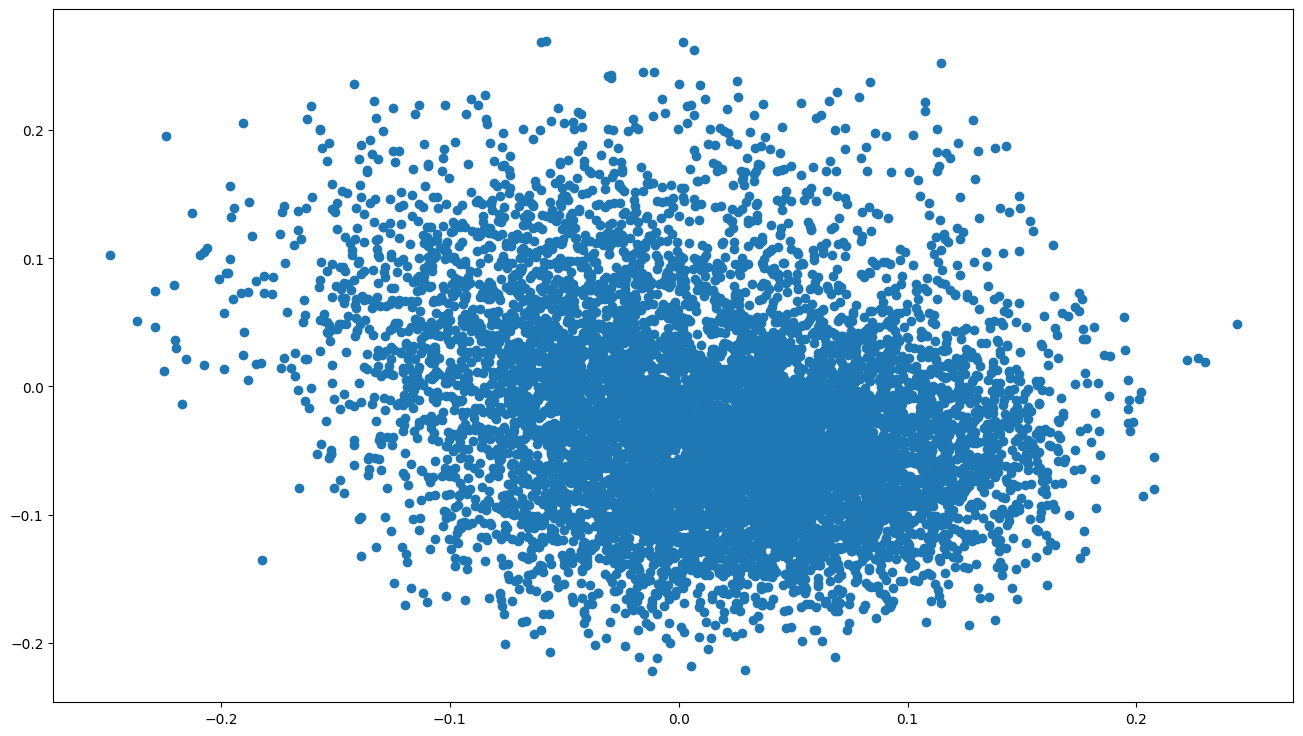

In [6]:
plt.figure(figsize=(16,9))
plt.scatter(dfReps[10], dfReps[11])

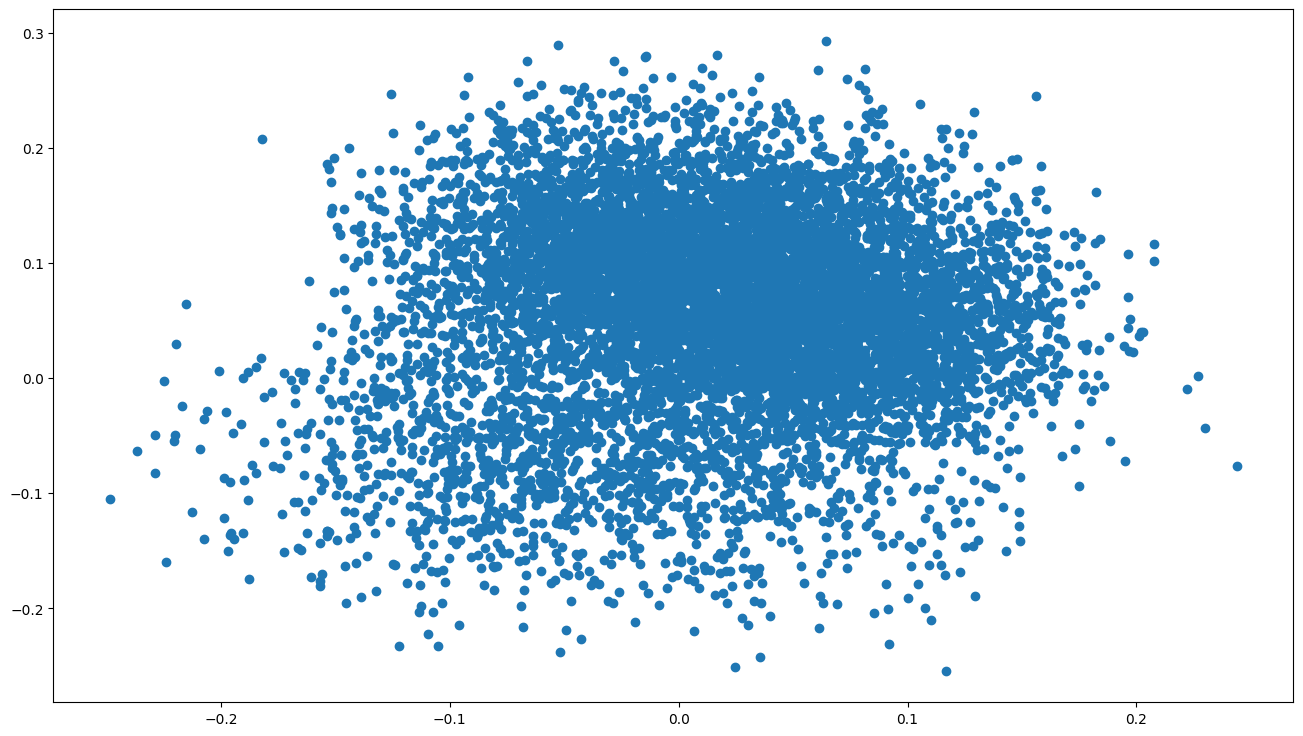

In [7]:
plt.figure(figsize=(16,9))
plt.scatter(dfReps[10], dfReps[14])

In [8]:
pca = PCA(n_components = 2)
XPCAreduced = pca.fit_transform(dfReps)

In [9]:
pca.explained_variance_ratio_

array([0.13126491, 0.08182964])

In [10]:
plt.figure(figsize=(16,9))
plt.scatter(XPCAreduced[:,0], XPCAreduced[:,1])
plt.xlabel('PC1')
plt.ylabel('PCA2')

Text(0, 0.5, 'PCA2')

In [11]:
Reps = dfReps.values

In [12]:
wcss = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(Reps)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,9))
plt.plot(range(1, 25), wcss)

In [13]:
model = KMeans(n_clusters=15, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = model.fit_predict(Reps)
ll_predictions = model.predict(Reps)

In [14]:
model = TSNE(learning_rate=100)

In [15]:
transformed = model.fit_transform(Reps)

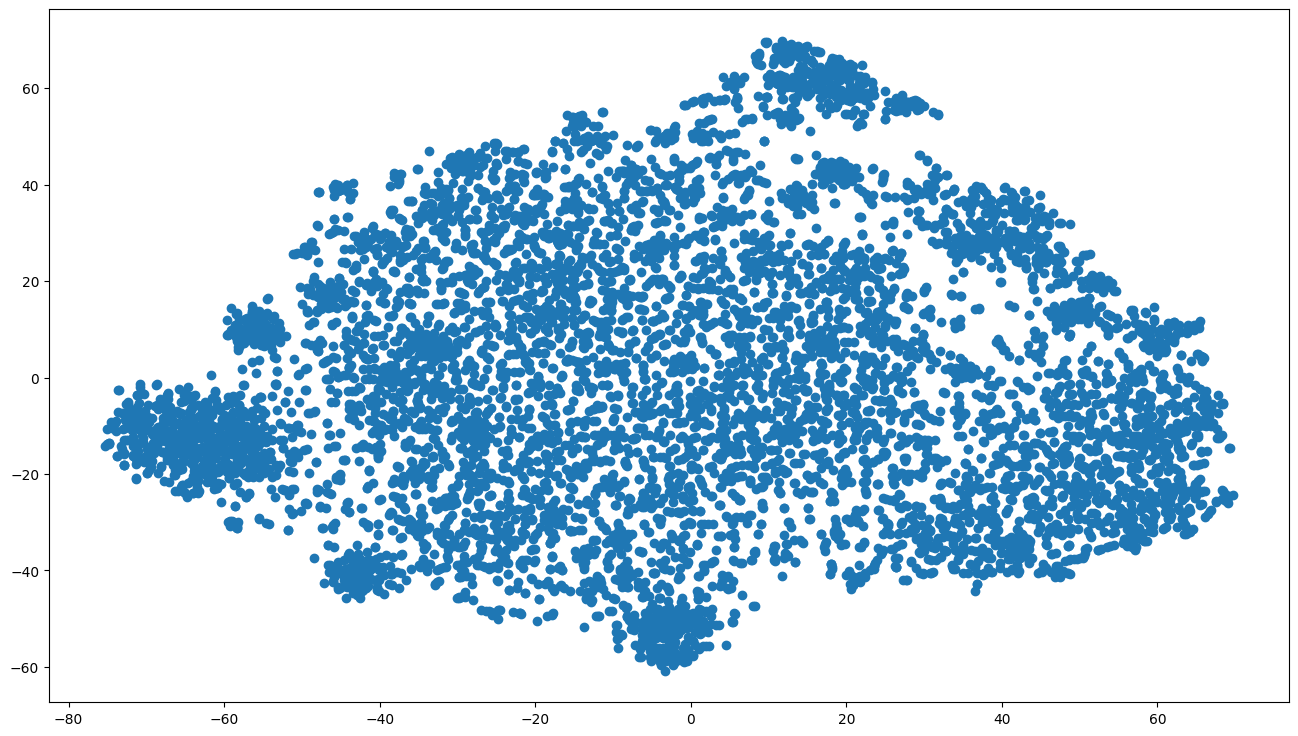

In [16]:
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
plt.figure(figsize=(16,9))
plt.scatter(x_axis, y_axis)#, c=Reps.target)

In [17]:
Gmodel = GaussianMixture(n_components=15)
Gmodel.fit(Reps)
labels = Gmodel.predict(Reps)

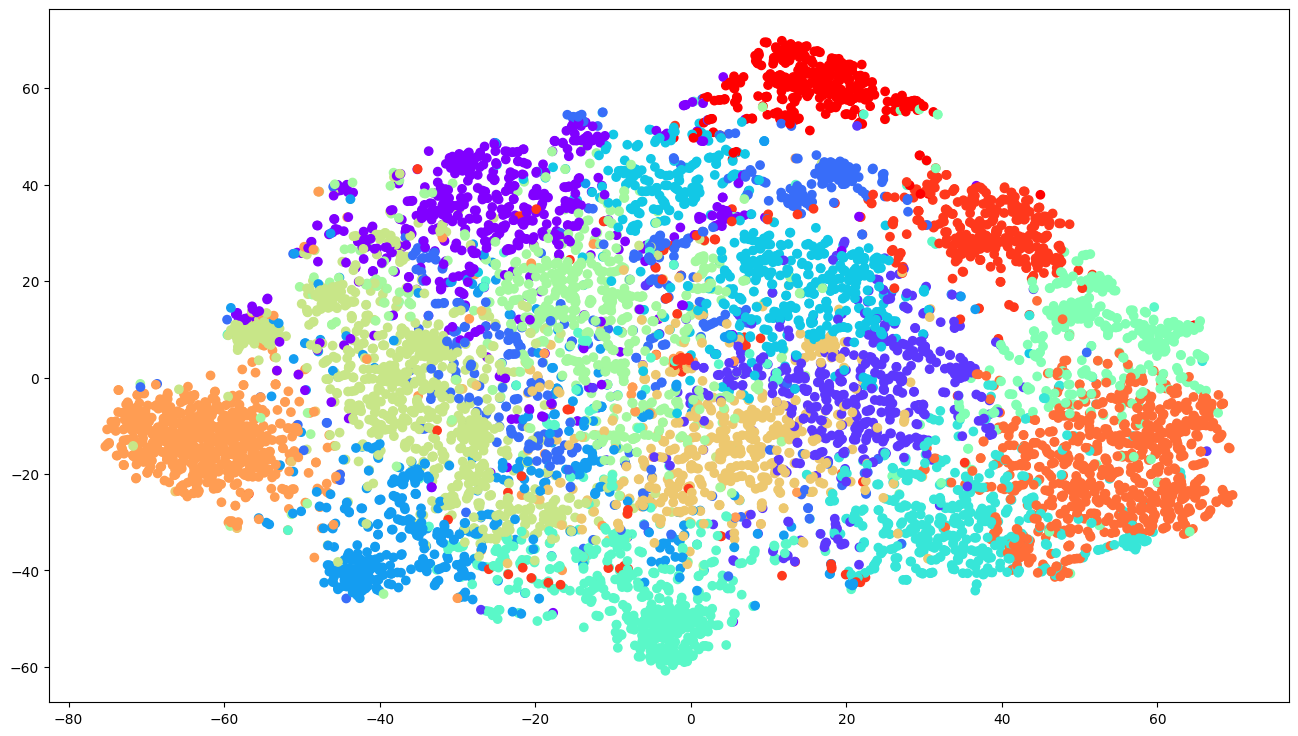

In [18]:
plt.figure(figsize=(16,9))
plt.scatter(x_axis, y_axis, c=labels, cmap='rainbow')

In [19]:
plt.figure(figsize=(16,9))
plt.scatter(x_axis, y_axis, c=ll_predictions, cmap='rainbow')

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
pd.DataFrame(confusion_matrix(ll_predictions, labels))

0    1    2    3    4    5    6    7    8    9    10   11   12   13   14
0     0    4    1    0    0    0    0  315    0    0    1    0    2   19    1
1     7    4    1  511    0    0   13    0   58   58    4   11    0    0    0
2    10   14    6   12    3    0  538    0    9    3    1    0    0    2    0
3     2  356    4    0  278    0    0    6    3    0    6    0    0    8    1
4     6    0   25   17    0    0   11    0   14  818    2    3    0    1    0
5     0    4    0    0    0   71    0    6    0    0    0    0  410    0    0
6    48    3    2    2  287    0    0    0  278    0    1    3    0    0    0
7     2    3    3    2    0    0    3    0   15    5    0  668    0    0    0
8   570    0   21    9   11    0    2    0   63   74    0    2    0    1    1
9     8    7  378   10   18    0    0    1  158   26   21    1    0    0    0
10    0    0    2    1    7    0    1    0    1    0    0    0    0    1  369
11    4    2   44    0    8    0    6    6    0    2    4    1    0  436    0
12    0   94    5    6   10    7    5    0   57    7  516    1    0    1    0
13    0   38    1    1    0  373    0    3    2    0    0    0   87    0    0
14    0   22    0    0    0   19    0   86    0    0    0    0  361    0    0

In [21]:
print(classification_report(ll_predictions, labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       343
           1       0.01      0.01      0.01       667
           2       0.01      0.01      0.01       598
           3       0.00      0.00      0.00       664
           4       0.00      0.00      0.00       897
           5       0.15      0.14      0.15       491
           6       0.00      0.00      0.00       624
           7       0.00      0.00      0.00       701
           8       0.10      0.08      0.09       754
           9       0.03      0.04      0.03       628
          10       0.00      0.00      0.00       382
          11       0.00      0.00      0.00       513
          12       0.00      0.00      0.00       709
          13       0.00      0.00      0.00       505
          14       0.00      0.00      0.00       488

    accuracy                           0.02      8964
   macro avg       0.02      0.02      0.02      8964
weighted avg       0.02   

In [22]:
best_gmx = GaussianMixture(n_components=15)
min_aic = 1000000000
for i in range(5, 25):
    gmx = GaussianMixture(n_components=i).fit(Reps)
    aic_ = gmx.aic(Reps)
    if aic_ < min_aic:
        min_aic = aic_
        best_gmx = gmx
min_aic

-8840564.45199608

In [23]:
best_gmx.means_.shape

(15, 128)

In [24]:
lbl2 = GaussianMixture(n_components=15).fit_predict(transformed[:, :2])

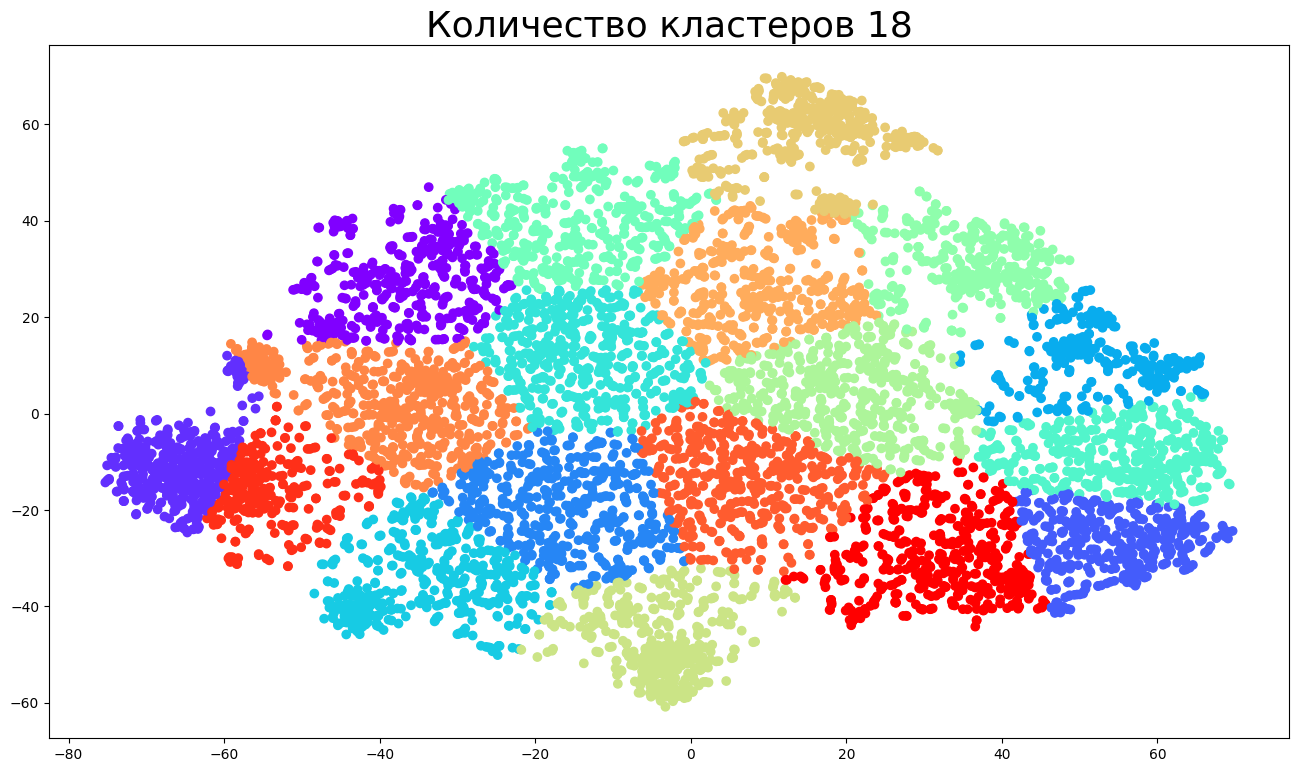

In [98]:
FCMmodel = FCM(n_clusters=18)
FCMmodel.fit(transformed[:, :2])
labels1 = FCMmodel.predict(transformed[:, :2])
plt.figure(figsize=(16,9))
plt.title('Количество кластеров 18', fontsize=26)
plt.scatter(x_axis, y_axis, c=labels1, cmap='rainbow')

In [27]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(labels1, labels))


0    1    2    3    4    5    6    7    8    9    10   11   12   13   14
0     0   52    6   11    0  387    3   16    1    0   11    0  124   10    0
1    68    0   34   21    0    0    2    0   37  473    0   22    0    0    0
2     0    0    7    9    0    0    0    0    6    9    6  615    0    1    0
3     2  312   12    7  272    4   10    4   15    0   70    2    0   10    0
4     0  136   29   21    7   16   12    0   81    6  372    9    1    2    0
5   429    0   24   14    8    0    1    0   52   47    0    6    0    4    0
6    13    3   83  113    0    0   19    0   39  299   33    3    0    7    0
7   101    1  123    1  277    0    5    1   64    5    4    1    0   21    6
8     2    1    7  315    0    0   76    0    3  129    3   15    0    5    0
9     3   10   17    2   28    0    3   53    0    0    1    0    1  374    7
10   30    4   62   22   25    0   13    0  357   19   38   13    0   20    0
11    2   10    9   33    0    0  431    0    2    5   18    3    0   13    0
12    0    1    0    0    0   48    0    8    0    0    0    0  538    0    0
13    0   19    1    0    1   15    1  336    0    0    0    0  196    2    1
14    7    2   79    2    4    0    3    5    1    1    0    1    0    0  358

In [28]:
from sklearn.cluster import OPTICS
dbs = OPTICS(algorithm='brute', n_jobs=-1)
dbs.fit(Reps)
labels3 = dbs.labels_

In [29]:
plt.figure(figsize=(16,9))
plt.scatter(x_axis, y_axis, c=labels3, cmap='rainbow')

In [30]:
from sklearn.cluster import AgglomerativeClustering
ward_cls = AgglomerativeClustering(n_clusters=15, linkage='ward', compute_distances=True)
ward_cls.fit(Reps)

AgglomerativeClustering(compute_distances=True, n_clusters=15)

In [31]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


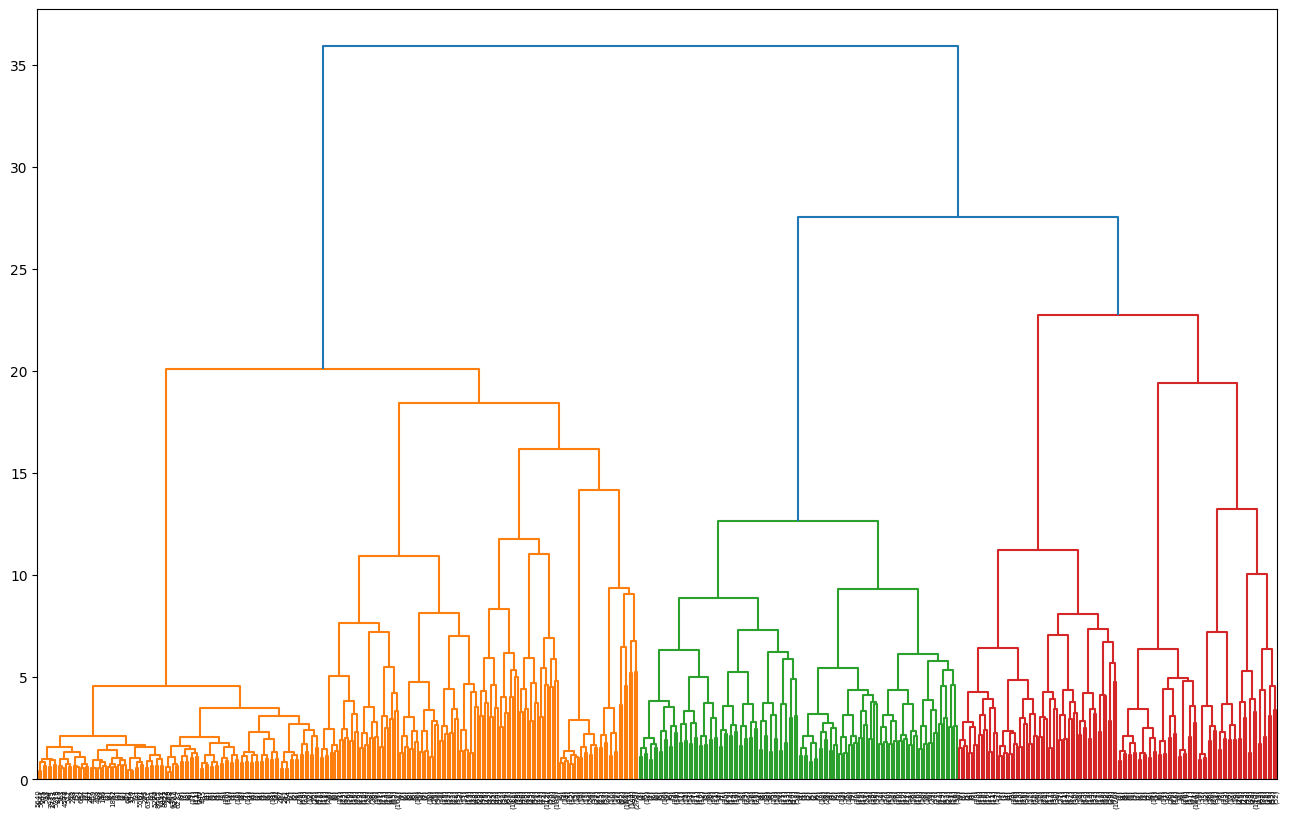

In [32]:
plt.figure(figsize=(16,10))
plot_dendrogram(ward_cls, truncate_mode="level", p=8)

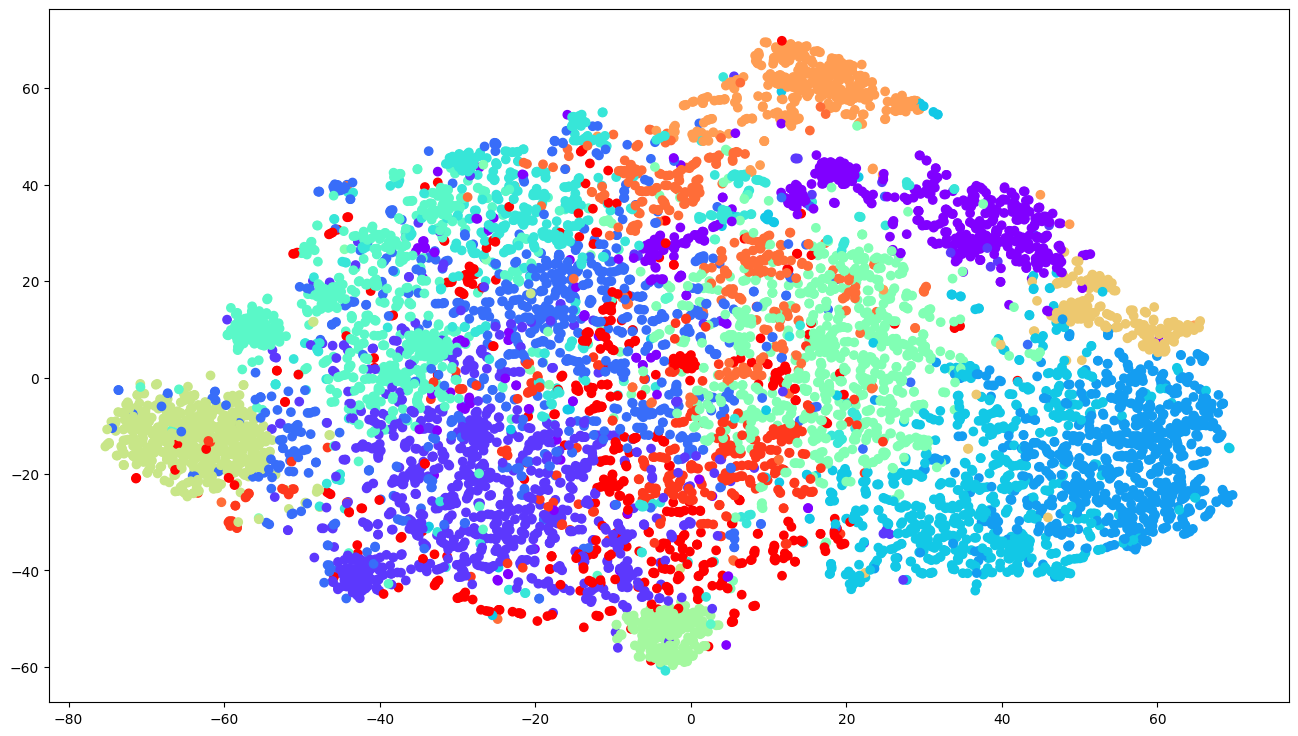

In [33]:
plt.figure(figsize=(16,9))
plt.scatter(x_axis, y_axis, c=ward_cls.labels_, cmap='rainbow')

In [34]:
compl_cls = AgglomerativeClustering(n_clusters=15, linkage='complete', compute_distances=True)
compl_cls.fit(Reps)

AgglomerativeClustering(compute_distances=True, linkage='complete',
                        n_clusters=15)

In [35]:
plt.figure(figsize=(16,10))
plot_dendrogram(compl_cls, truncate_mode="level", p=7)

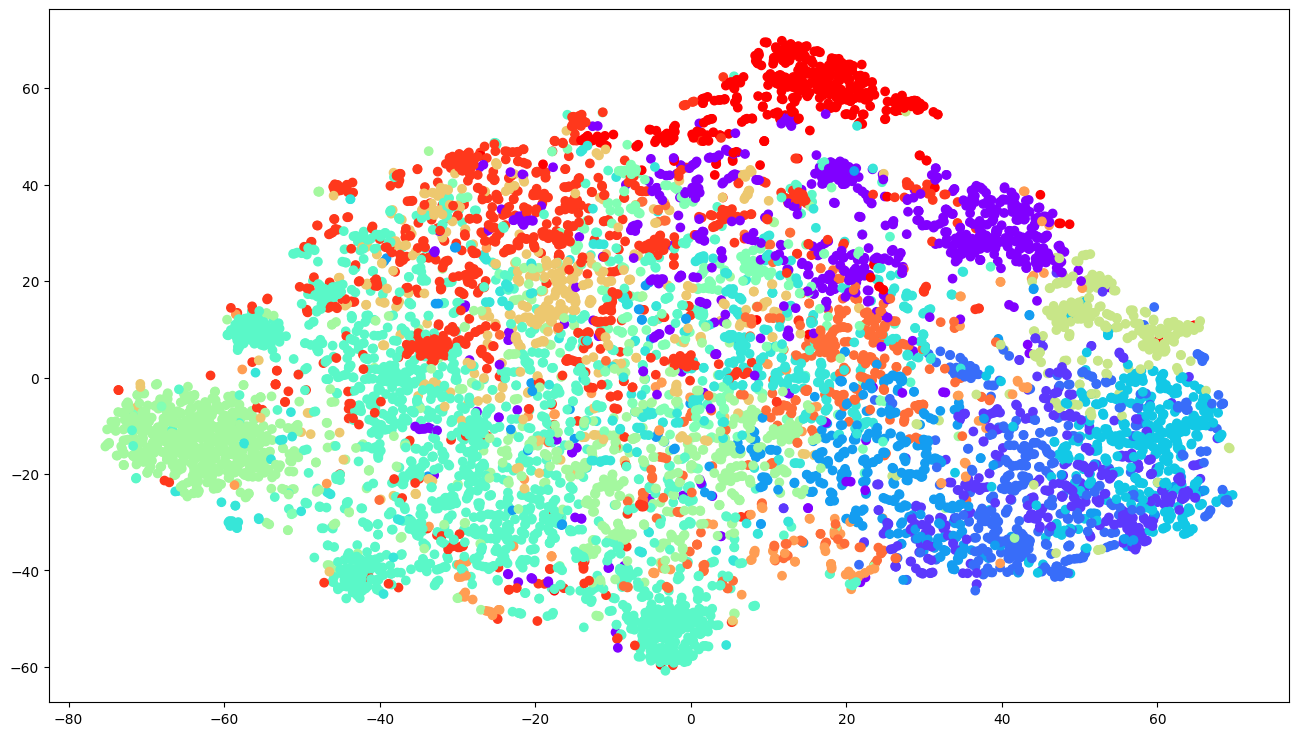

In [36]:
plt.figure(figsize=(16,9))
plt.scatter(x_axis, y_axis, c=compl_cls.labels_, cmap='rainbow')

In [37]:
labels

array([5, 7, 3, ..., 9, 9, 4], dtype=int64)

In [38]:
M = []
for i in range(len(labels)):
    if labels[i] == 14:
        M.append(i)
len(M)

372

In [39]:
dfReps.iloc[M]

0         1         2         3         4         5         6    \
20    0.029848  0.193755  0.269318  0.127852  0.008785  0.055497  0.030424   
21    0.024840  0.074402  0.173272  0.090088  0.083018  0.019666  0.011430   
77    0.066601  0.002214  0.133495  0.145452  0.083178  0.065335  0.109010   
78    0.050126 -0.026364  0.218417  0.144048  0.107465  0.097129  0.009939   
643   0.058995 -0.033443  0.209141  0.198891 -0.003222 -0.018248 -0.057205   
...        ...       ...       ...       ...       ...       ...       ...   
8893 -0.042204 -0.063728  0.019684  0.123858  0.015884  0.118011 -0.043083   
8901 -0.125144  0.110986  0.250797  0.145495  0.009821  0.007531  0.034154   
8902  0.002668 -0.032365  0.188449  0.058471  0.062654  0.113267  0.004351   
8904 -0.058954  0.092582  0.006963  0.080940  0.082293  0.060038  0.018838   
8950 -0.071575 -0.094253  0.217941  0.171402 -0.017976 -0.005423 -0.070236   

           7         8         9    ...       118       119       120  \
20   -0.188556  0.007113 -0.033102  ... -0.082156  0.009927  0.035463   
21   -0.169690  0.034177 -0.070961  ... -0.039213  0.077356  0.025401   
77    0.009026  0.030202 -0.123346  ... -0.180057  0.098865  0.030384   
78   -0.164446  0.054032 -0.105771  ... -0.118889 -0.022646  0.022204   
643  -0.210662  0.160851 -0.195267  ... -0.043201 -0.005043 -0.015950   
...        ...       ...       ...  ...       ...       ...       ...   
8893 -0.210930  0.155664 -0.159861  ... -0.024901 -0.019266  0.075062   
8901 -0.080860  0.058865 -0.018222  ... -0.016086  0.071420  0.058692   
8902 -0.142257 -0.076755 -0.073009  ... -0.038434  0.025965  0.113921   
8904 -0.262342  0.166603 -0.061548  ...  0.078830  0.082257  0.110024   
8950 -0.153667  0.113658 -0.175593  ...  0.032413  0.052178  0.061884   

           121       122       123       124       125       126       127  
20    0.019202 -0.055280 -0.073739  0.166443  0.075431  0.114611 -0.101173  
21    0.065205 -0.032254 -0.105619  0.085391  0.102123 -0.038023 -0.146716  
77    0.126895  0.021185 -0.023376  0.035621  0.052769  0.064272 -0.019617  
78    0.060702 -0.036534 -0.157650  0.179008  0.145110  0.053137 -0.012191  
643   0.139644 -0.046793 -0.118224  0.142103  0.123540  0.065132 -0.086238  
...        ...       ...       ...       ...       ...       ...       ...  
8893 -0.040222 -0.041883 -0.107086 -0.070770  0.179532 -0.018687  0.078245  
8901  0.082720 -0.035335 -0.070921  0.094996  0.160614  0.027225 -0.061395  
8902 -0.058403 -0.008247 -0.156350  0.091416  0.153223 -0.016036 -0.022093  
8904 -0.016821 -0.048751 -0.004772  0.069184  0.098458  0.083934 -0.100738  
8950  0.027763 -0.121293 -0.129348  0.085124  0.144500  0.060971  0.015571  

[372 rows x 128 columns]

In [40]:
dfLabels.iloc[M]

ID                                             Images
20      18  ./aligned-images/Justin_Gatlin/Justin_Gatlin_0...
21      18  ./aligned-images/Justin_Gatlin/Justin_Gatlin_0...
77      49  ./aligned-images/Cheryl_Ford/Cheryl_Ford_0001.png
78      50  ./aligned-images/Julius_Erving/Julius_Erving_0...
643     66        ./aligned-images/Ivan_Lee/Ivan_Lee_0001.png
...    ...                                                ...
8893  3729  ./aligned-images/Kenenisa_Bekele/Kenenisa_Beke...
8901  3736    ./aligned-images/Chris_Byrd/Chris_Byrd_0001.png
8902  3736    ./aligned-images/Chris_Byrd/Chris_Byrd_0002.png
8904  3738  ./aligned-images/Anil_Ramsook/Anil_Ramsook_000...
8950  3763  ./aligned-images/Dustan_Mohr/Dustan_Mohr_0001.png

[372 rows x 2 columns]

In [105]:
from sklearn.cluster import MeanShift
ms = MeanShift(bandwidth=.8)
ms.fit(Reps)
labelMS1 = ms.predict(Reps)

In [106]:
plt.figure(figsize=(16,9))
plt.title('Пропускная способность 0.8', fontsize=26)
plt.scatter(x_axis, y_axis, c=labelMS1, cmap='rainbow')

In [43]:
max(labelMS1)

3284

C:\Users\Leo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


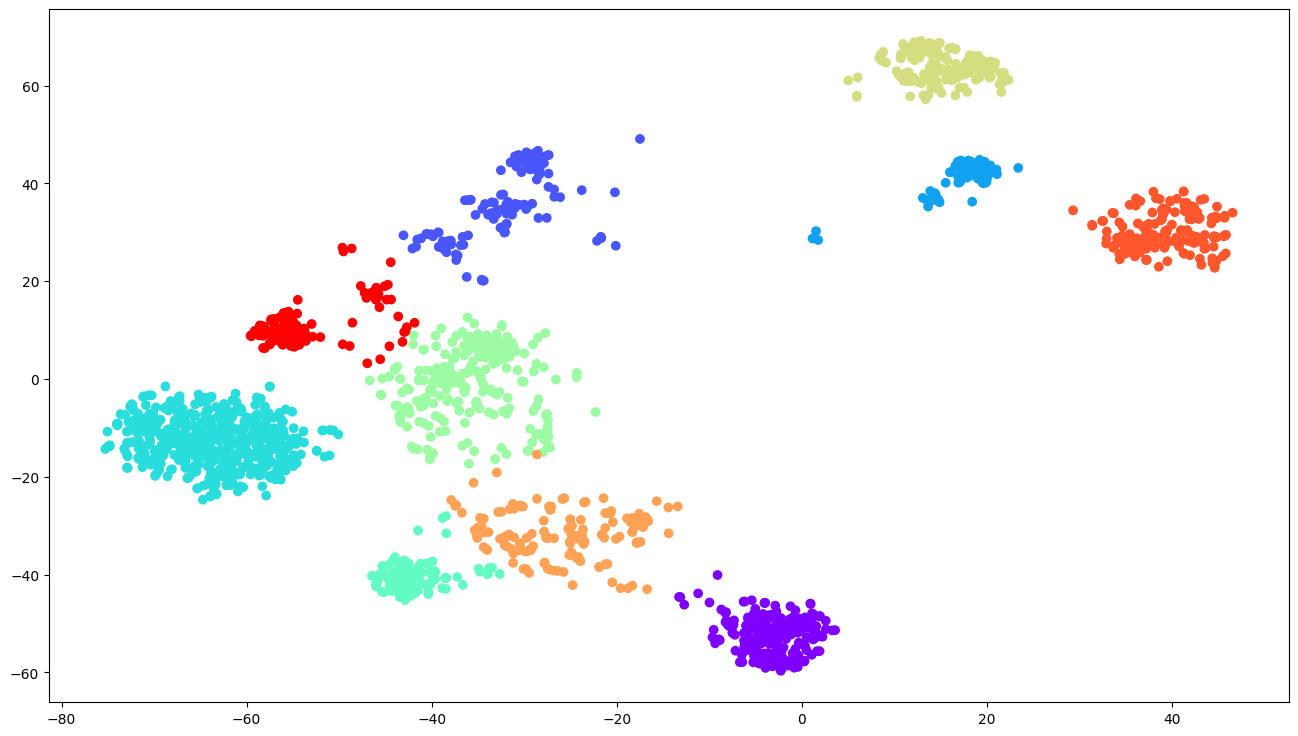

In [44]:
XMeanShift = np.array([])
YMeanShift = np.array([])

XMeanShiftR = np.array([])
YMeanShiftR = np.array([])

n=11
for i in range(len(x_axis)):
    if labelMS1[i] in range(n):
        XMeanShift = np.append(XMeanShift, x_axis[i])
        YMeanShift = np.append(YMeanShift, y_axis[i])
    else:
        XMeanShiftR = np.append(XMeanShiftR, x_axis[i])
        YMeanShiftR = np.append(YMeanShiftR, y_axis[i])

T = np.array([XMeanShift, YMeanShift]).T
R = np.array([XMeanShiftR, YMeanShiftR]).T
#Gmodel = GaussianMixture(n_components=n)
#Gmodel.fit(R)
#labels = Gmodel.predict(R)


Kme = KMeans(n_clusters=n-1)
Kme.fit(T)
labels = Kme.predict(T)

plt.figure(figsize=(16,9))
plt.scatter(XMeanShift, YMeanShift, c=labels, cmap='rainbow')

In [45]:
len(YMeanShift)/8963

0.2243668414593328

In [46]:
model = TSNE(learning_rate=100)

In [47]:
transformed1 = model.fit_transform(R)

In [48]:
x_axis1 = transformed1[:, 0]
y_axis1 = transformed1[:, 1]
plt.figure(figsize=(16,9))
plt.scatter(x_axis1, y_axis1)

In [49]:
M = []
for i in range(len(labelMS1)):
    if labelMS1[i] == 9:
        M.append(i)
len(M)

130

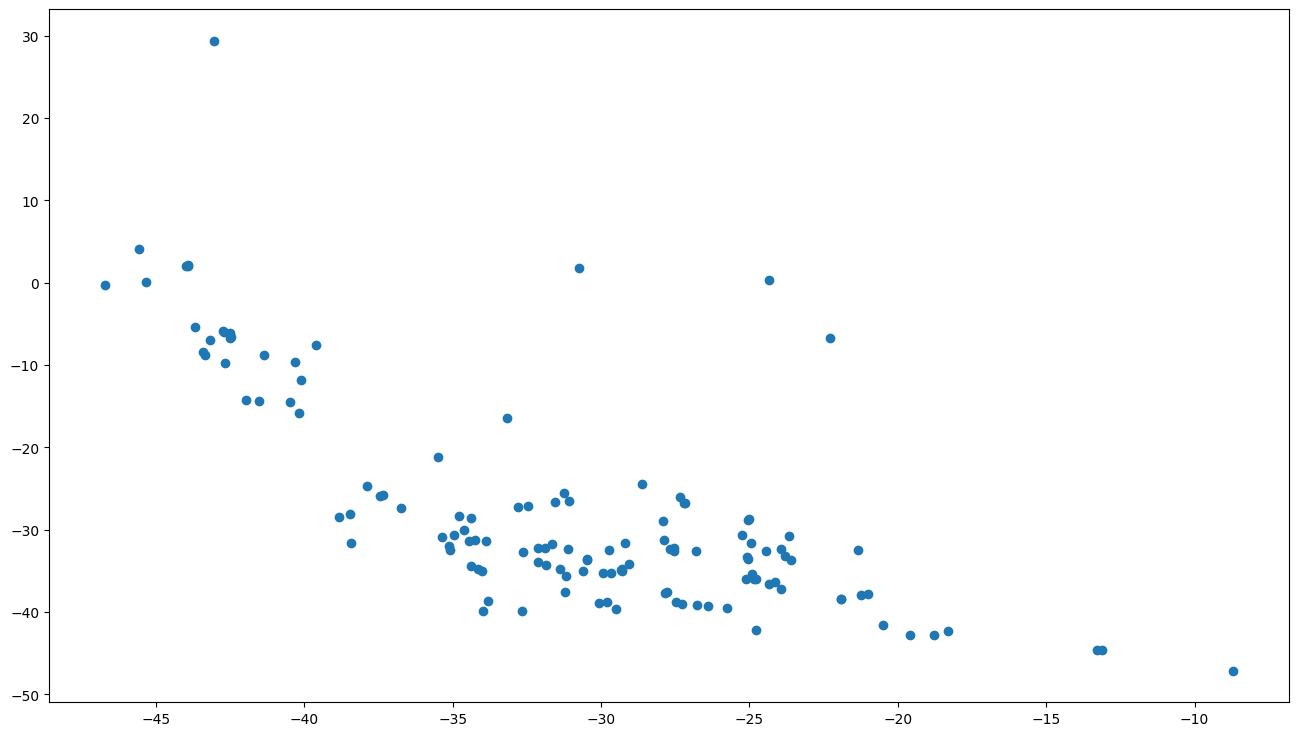

In [50]:
XMeanShift = np.array([])
YMeanShift = np.array([])
for i in range(len(x_axis)):
    if labelMS1[i] == 9:
        XMeanShift = np.append(XMeanShift, x_axis[i])
        YMeanShift = np.append(YMeanShift, y_axis[i])
plt.figure(figsize=(16,9))
plt.scatter(XMeanShift, YMeanShift)

In [51]:
pd.set_option('display.max_rows', 11)
pd.set_option('display.max_columns', 21)
pd.set_option('display.max_colwidth', None)
dfLabels.iloc[M]

ID  \
712     92   
998    186   
1082   227   
1111   245   
1203   288   
...    ...   
8595  3592   
8649  3610   
8650  3610   
8652  3610   
8728  3646   

                                                                     Images  
712                     ./aligned-images/Ahmed_Qureia/Ahmed_Qureia_0001.png  
998           ./aligned-images/Masatoshi_Koshiba/Masatoshi_Koshiba_0001.png  
1082                ./aligned-images/Gerhard_Schmid/Gerhard_Schmid_0001.png  
1111                ./aligned-images/George_HW_Bush/George_HW_Bush_0007.png  
1203                  ./aligned-images/Gene_Robinson/Gene_Robinson_0002.png  
...                                                                     ...  
8595                ./aligned-images/Edmund_Hillary/Edmund_Hillary_0001.png  
8649  ./aligned-images/Alvaro_Silva_Calderon/Alvaro_Silva_Calderon_0001.png  
8650  ./aligned-images/Alvaro_Silva_Calderon/Alvaro_Silva_Calderon_0002.png  
8652  ./aligned-images/Alvaro_Silva_Calderon/Alvaro_Silva_Calderon_0004.png  
8728                      ./aligned-images/George_Karl/George_Karl_0001.png  

[130 rows x 2 columns]

In [52]:
dfReps["ID"] = dfLabels["ID"]
dfReps

0         1         2         3         4         5         6  \
0    -0.001408  0.022750 -0.036480 -0.027407  0.064229 -0.011267  0.013919   
1     0.004791  0.086845 -0.109505  0.051257 -0.022498  0.083768 -0.014519   
2    -0.007272  0.141975  0.086605 -0.015617 -0.038965 -0.112317 -0.038603   
3     0.002383  0.174413  0.065322  0.023270  0.002265  0.179626  0.098574   
4    -0.043023  0.107177  0.066742 -0.089319  0.009025  0.106709 -0.114570   
...        ...       ...       ...       ...       ...       ...       ...   
8959 -0.092250  0.070380  0.061099 -0.033999 -0.049472  0.119556  0.054851   
8960 -0.102624 -0.043740  0.141057  0.000088  0.023377  0.008333  0.100980   
8961  0.042697  0.023032  0.056891 -0.138349  0.040340 -0.047484 -0.069085   
8962  0.073917 -0.037940 -0.067681 -0.160153  0.064515  0.022194 -0.101104   
8963 -0.047164 -0.035374 -0.012758 -0.008590  0.038726  0.180980 -0.111368   

             7         8         9  ...       119       120       121  \
0     0.098740 -0.003795  0.036904  ...  0.027183  0.007947  0.130458   
1     0.088053  0.045197  0.114967  ...  0.125288 -0.013591  0.028008   
2    -0.154186 -0.149971  0.053936  ... -0.132974  0.017951  0.043308   
3    -0.023726 -0.084902  0.063512  ...  0.178860  0.070737 -0.094241   
4     0.061508 -0.133919  0.068033  ...  0.072702  0.101743 -0.013668   
...        ...       ...       ...  ...       ...       ...       ...   
8959  0.152543 -0.094762  0.161939  ...  0.053988  0.058339 -0.224553   
8960  0.100785 -0.034723  0.112871  ...  0.048326  0.021840 -0.120977   
8961 -0.021808  0.100171 -0.018846  ... -0.053575  0.086971  0.057312   
8962 -0.075092  0.092974 -0.034605  ... -0.023109  0.113362 -0.025065   
8963 -0.142491  0.109625 -0.085559  ...  0.098864  0.159752 -0.148061   

           122       123       124       125       126       127    ID  
0     0.124136 -0.033051 -0.046648 -0.070030  0.070983 -0.022960     1  
1     0.023849  0.160204  0.103464 -0.034831  0.021237  0.053009     2  
2    -0.009619 -0.090499  0.016239  0.063971  0.056256  0.049608     3  
3     0.003654  0.036258 -0.056480  0.108188 -0.067294 -0.046199     4  
4     0.120087 -0.044755 -0.021864  0.019891  0.126962  0.025752     5  
...        ...       ...       ...       ...       ...       ...   ...  
8959 -0.059463  0.005248  0.078918  0.038789  0.037755  0.106058  3768  
8960 -0.040975 -0.006793 -0.046231  0.092884  0.125201  0.117523  3768  
8961  0.123967  0.062298  0.024695 -0.025318  0.157106  0.070741  3769  
8962  0.128965  0.072116  0.064650 -0.100275  0.091723  0.080392  3769  
8963 -0.066928  0.002393 -0.002471  0.063102  0.030683  0.137764  3770  

[8964 rows x 129 columns]

In [53]:
df = dfReps.drop_duplicates (subset=["ID"])
df = df.rename(index=df["ID"])
df.pop("ID")
df

0         1         2         3         4         5         6    \
1    -0.001408  0.022750 -0.036480 -0.027407  0.064229 -0.011267  0.013919   
2     0.004791  0.086845 -0.109505  0.051257 -0.022498  0.083768 -0.014519   
3    -0.007272  0.141975  0.086605 -0.015617 -0.038965 -0.112317 -0.038603   
4     0.002383  0.174413  0.065322  0.023270  0.002265  0.179626  0.098574   
5    -0.043023  0.107177  0.066742 -0.089319  0.009025  0.106709 -0.114570   
...        ...       ...       ...       ...       ...       ...       ...   
3766  0.008064  0.049258  0.020508 -0.125455 -0.079449 -0.069027 -0.094745   
3767  0.029617 -0.029970 -0.013242 -0.069343 -0.087107  0.120823 -0.094390   
3768 -0.092250  0.070380  0.061099 -0.033999 -0.049472  0.119556  0.054851   
3769  0.042697  0.023032  0.056891 -0.138349  0.040340 -0.047484 -0.069085   
3770 -0.047164 -0.035374 -0.012758 -0.008590  0.038726  0.180980 -0.111368   

           7         8         9    ...       118       119       120  \
1     0.098740 -0.003795  0.036904  ... -0.140182  0.027183  0.007947   
2     0.088053  0.045197  0.114967  ...  0.009775  0.125288 -0.013591   
3    -0.154186 -0.149971  0.053936  ... -0.172162 -0.132974  0.017951   
4    -0.023726 -0.084902  0.063512  ... -0.048377  0.178860  0.070737   
5     0.061508 -0.133919  0.068033  ...  0.018269  0.072702  0.101743   
...        ...       ...       ...  ...       ...       ...       ...   
3766 -0.050560  0.060296  0.072806  ... -0.106968 -0.088408  0.068225   
3767  0.129909  0.085514 -0.064984  ...  0.100361  0.113626  0.109054   
3768  0.152543 -0.094762  0.161939  ...  0.155666  0.053988  0.058339   
3769 -0.021808  0.100171 -0.018846  ... -0.148648 -0.053575  0.086971   
3770 -0.142491  0.109625 -0.085559  ...  0.002472  0.098864  0.159752   

           121       122       123       124       125       126       127  
1     0.130458  0.124136 -0.033051 -0.046648 -0.070030  0.070983 -0.022960  
2     0.028008  0.023849  0.160204  0.103464 -0.034831  0.021237  0.053009  
3     0.043308 -0.009619 -0.090499  0.016239  0.063971  0.056256  0.049608  
4    -0.094241  0.003654  0.036258 -0.056480  0.108188 -0.067294 -0.046199  
5    -0.013668  0.120087 -0.044755 -0.021864  0.019891  0.126962  0.025752  
...        ...       ...       ...       ...       ...       ...       ...  
3766 -0.081271 -0.016692  0.005222  0.011289 -0.004871 -0.003148 -0.002686  
3767  0.069373  0.094617  0.026807  0.161234 -0.051191  0.158951  0.032847  
3768 -0.224553 -0.059463  0.005248  0.078918  0.038789  0.037755  0.106058  
3769  0.057312  0.123967  0.062298  0.024695 -0.025318  0.157106  0.070741  
3770 -0.148061 -0.066928  0.002393 -0.002471  0.063102  0.030683  0.137764  

[3770 rows x 128 columns]